# Building a Simple Chatbot using Python

1. Introduction to NLP and Chatbot Frameworks

Definition and importance of NLP:

Natural Language Processing (NLP) is a field of artificial intelligence that focuses on the interaction between computers and humans through natural language. The ultimate goal of NLP is to enable computers to understand, interpret and generate human langauges in a way that is both meaningful and useful.

**Applications of NLP:**

* Sentiment Analysis
* Language Processing
* Chatbots and Virtual Assistants
* Text Summarization
* Speech Recognition

# Common NLP tasks

Tokenization

Tokenization is the process of breaking text into individual words or tokens.

Stemming and Lemmatization

Stemming and Lemmatization are processes of reducing words to their root forms.

Stop Words Removal

Stop Words are common words that add little meaning to text and are often removed in preprocessing.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = "Natural Language Processing is fascinating"
tokens = word_tokenize(text)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Natural', 'Language', 'Processing', 'is', 'fascinating']


In [ ]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
words = ["running", "ran", "runs"]
stems = [stemmer.stem(word) for word in words]
print(stems)

['run', 'ran', 'run']


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
words = ["running", "ran", "runs"]
lemmas = [lemmatizer.lemmatize(word, pos = 'v') for word in words]
print(lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...


['run', 'run', 'run']


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_text = [word for word in tokens if word.lower() not in stop_words]
print(filtered_text)

['Natural', 'Language', 'Processing', 'fascinating']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Overview of NLP Libraries

NLTK (Natural Language Toolkit)

Natural Language Toolkit is a powerful library for various NLP tasks, Including tokenization, stemming, lemmatiziation, and more.

SpaCy

SpaCy is an open-source software library for advanced NLP tasks, known for its speed and efficiency.

TextBlob


TextBlob is a simple library for processing textual data, providing easy-to-use APIs for common NLP tasks

Introduction to Chatbot Frameworks

ChatterBot

ChatterBot is a python libraary that makes it easy to generate automated responses to users-input.

Rasa

Rasa is an open source framework for building conversational AI, including chatbots and voice assistants.

# Designing and Training a Simple Chatbot

Preprocessing Text Data

Before training a chatbot, we need to preprocess the text data by tokenizing the text, removing stop words, and applying stemming or lemmatization.

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('chatbot_dataset.csv')

# Preprocess the text data
nltk.download('punkt')
data['Question'] = data['Question'].apply(lambda x: ' '.join(nltk.word_tokenize(x.lower())))
print(data.head())



                          Question  \
0          what are your interests   
1  what are your favorite subjects   
2          what are your interests   
3              what is your number   
4              what is your number   

                                              Answer  
0  I am interested in all kinds of things. We can...  
1  My favorite subjects include robotics, compute...  
2  I am interested in a wide variety of topics, a...  
3                            I don't have any number  
4                                        23 skiddoo!  


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Vectorizing Text Data

We convert the text adat into numerical values using TF-IDF (Term-Frequency-Inverse-Document Frequency) vectorization.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Question'])
print(X.shape)

(566, 509)


# Training a classification model

We use the Naive Bayes Classifier to train the model on the vectorized text data.

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Question'], data['Answer'], test_size=0.2, random_state=42)

# Create a model pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train, y_train)
print("Model training complete")

Model training complete


# Implementing a Function to get Chatbot Responses

we write a function to process user input and return responses based on the trained model.

In [12]:
# Function to get a response from a chatbot
def get_response(question):
  question = " ".join(nltk.word_tokenize(question.lower()))
  answer = model.predict([question])[0]
  return answer

# Testing the fucntion
print(get_response("What is a chat bot"))

what is your favorite stock


# Naive Bayes Classifier

Baye's theorem

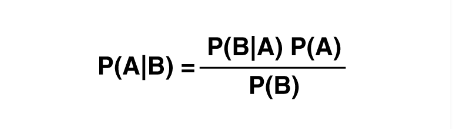

**What is Naive Bayes Classifier?**

Naive Bayes classifiers are a collection of classification algorithms based on Bayes' Theorem. Naïve Bayes algorithm is used for classification problems. It is highly used in text classification.

**Three types of probability we will use:**

1. Prior Probability (P(Class))
2. Likelihood (P(X|Class))
3. Posterior Probability (P(Class|X))


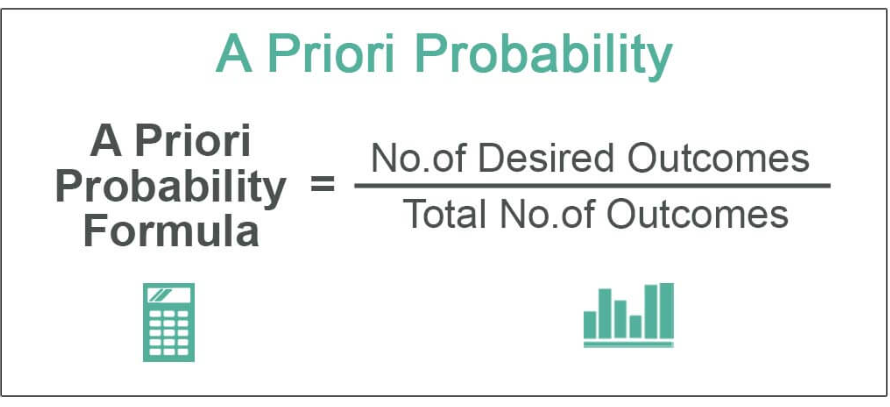

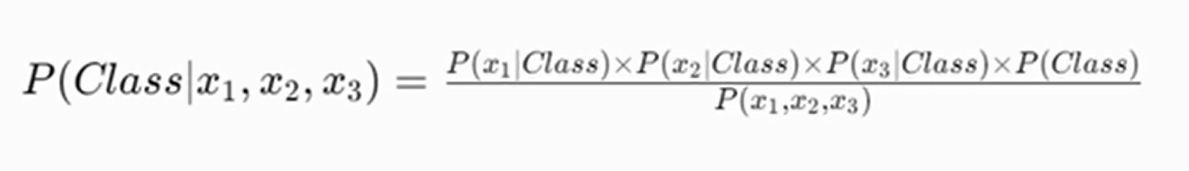

**Types of Naive Bayes Classifier**:

1. Gaussian
2. Nultinomial
3. Bernoulli

**Working**:

1. Model
2.Training